# MARLDynamics

> Modeling multi-agent reinforcement learning as dynamical systems

## Install
* clone this repository onto your disk
```sh
git clone https://github.com/wbarfuss/MARLDynamics.git
```

* enter the repositories folder
```sh
cd MARLDynamics
```

* install locally
```sh
pip install .
```

## How to use

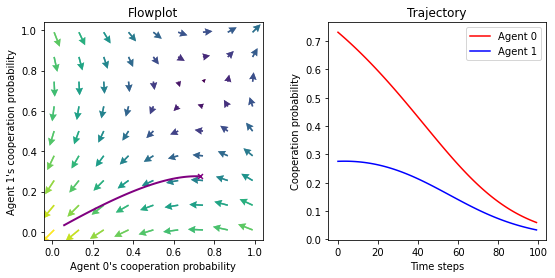

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from MARLDynamics.Agents.StrategyActorCritic import stratAC
from MARLDynamics.Environments.SocialDilemma import SocialDilemma
from MARLDynamics.Utils import FlowPlot as fp

# Init enviornment and MultiAgentEnvironment-interface
env = SocialDilemma(R=1.0, T=0.8, S=-0.5, P=0.0)
mae = stratAC(env=env, learning_rates=0.1, discount_factors=0.9)

# Compute learning trajectory 
x = mae.random_softmax_strategy()  # from a random inital policy
xtraj, fixedpointreached = mae.trajectory(x)

# PLOT
fig, axs = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(wspace=0.3)

# Plot in phase space
x = ([0], [0], [0])
y = ([1], [0], [0])
ax = fp.plot_strategy_flow(mae, x, y, flowarrow_points = np.linspace(0.01 ,0.99, 9), axes=[axs[0]])
fp.plot_trajectories([xtraj], x, y, cols=['purple'], axes=ax);
ax[0].set_xlabel("Agent 0's cooperation probability")
ax[0].set_ylabel("Agent 1's cooperation probability");
ax[0].set_title("Flowplot")

# Plot in trajectory
axs[1].plot(xtraj[:, 0, 0, 0], label="Agent 0", c='red')
axs[1].plot(xtraj[:, 1, 0, 0], label="Agent 1", c='blue')
axs[1].set_xlabel('Time steps')
axs[1].set_ylabel('Cooperation probability')
axs[1].legend()
axs[1].set_title("Trajectory");